## A notebook to explore the raw data using Napari

In [1]:
import mrc as Mrc
from scipy.fftpack import fftn, fftshift
import numpy as np
from tnia.plotting.projections import show_xyz_slice
import numpy as np
from tnia.plotting.projections import show_xyz_slice_center 

In [2]:
raw_name = r'D:\Janelia\Data 2024-06-12\rois_1\roi_128.mrc'
raw_mrc = Mrc.Mrc(raw_name)
raw = raw_mrc.data
print(raw.shape)

(975, 128, 128)


## Re-order data so each volume is contiguous

In [7]:
nphases = 5
ndirections = 3
nz = raw.shape[0]//(nphases*ndirections)

images = np.zeros((ndirections, nphases, nz, raw.shape[1], raw.shape[2]))

for d in range(ndirections):
    for p in range(nphases):
        n = d*nphases+p
        blob = raw[n::15,:,:]
        #fig = show_xyz_slice(blob)
        images[d,p,:,:,:] = blob


## View in Napari

In [8]:
import napari

viewer = napari.Viewer()

viewer.add_image(images, name='images')
viewer.dims.axis_labels = ['direction', 'phase', 'z', 'y', 'x']

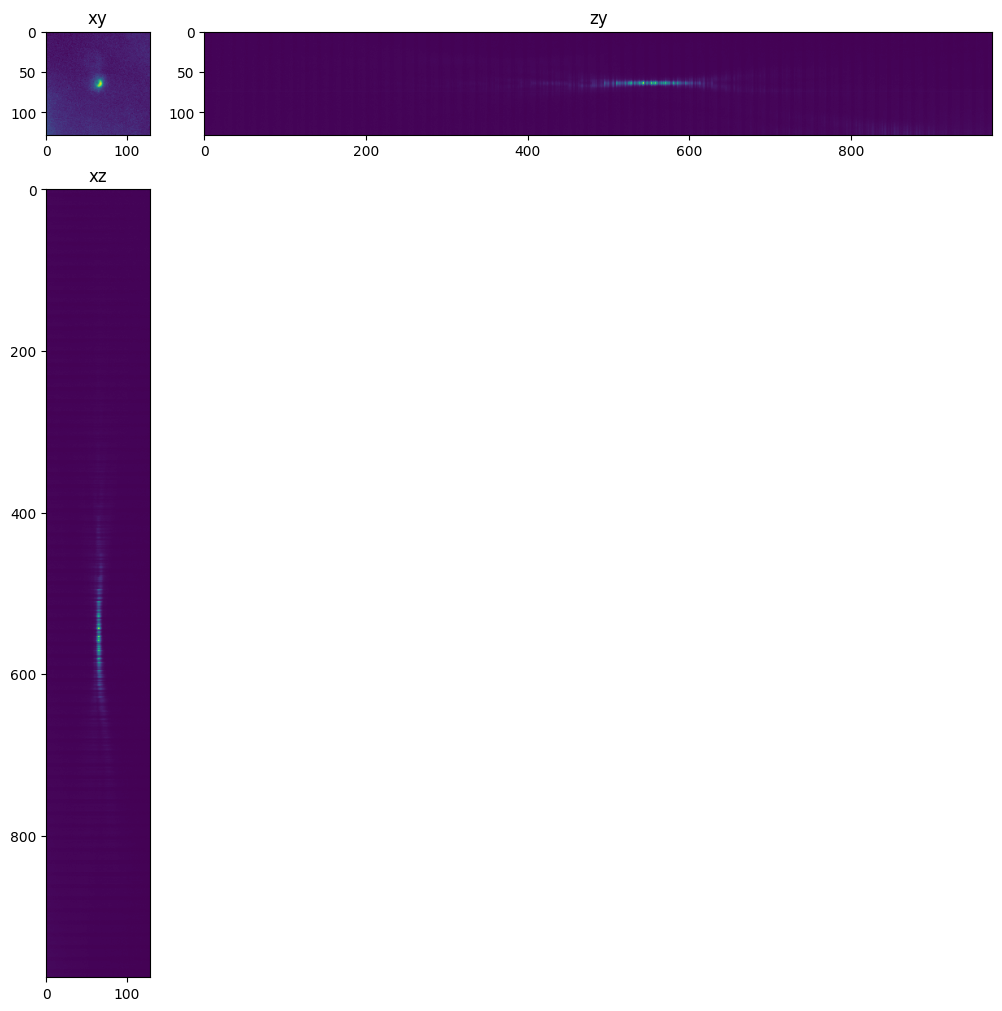

In [4]:
fig = show_xyz_slice_center(raw)